<h3> 머신러닝 Process </h3>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_names = iris.feature_names
iris_label = iris.target

df_iris = pd.DataFrame(data = iris_data, columns = iris_names)
df_iris['label'] = iris_label

df_iris.head(3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

In [ ]:
df_clf = DecisionTreeClassifier(random_state = 11)
df_clf.fit(X_train, y_train)

In [ ]:
pred = df_clf.predict(X_test)
print(pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # y_test = 실제 y test값 / pred = 학습된 모델이 y_train 으로 추정한 값

<h3> Dataset 관련 </h3>

In [ ]:
from sklearn.datasets import load_iris

# load_iris() -> 분류 / load_breast_cancer() -> 분류 / load_diabetes() -> 회귀 / load_digits() -> 분류

# 각각은 data / target / target_names / feature_names 로 구성된 dict 임


<h3> <b style = "color:Blue;"> sklearn.model_selection </b> : 학습 데이터와 테스트 데이터 구분 </h3>

from sklearn.model_selection import <b style = "color:red;"> train_test_split </b>

X_train, X_test, y_train, y_test = train_test_split(data, target, params : {test_size = 0.3 , shuffle = True, random_state = seed_number})

In [55]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. prepare data
iris = load_iris()
iris_data = iris.data
iris_features = iris.feature_names
iris_label = iris.target

df_iris = pd.DataFrame(data = iris_data, columns = iris_features)
df_iris['target'] = iris_label

# 2. train_test_split
df_train = df_iris.iloc[:, :-1]
df_target = df_iris.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_train, df_target, test_size = 0.3, shuffle = True)
# shuffle 이 true 이므로 할때마다 train/test 셋이 달라지고 그에 따라 모델도 달라짐

# 3. declare specific model
clf = DecisionTreeClassifier()

# 4. fit train data to model
clf.fit(X_train, y_train)

# 5. predict from test data
pred = clf.predict(X_test)

# 6. evaluate the result of prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))



0.9777777777777777


<h3> 교차검증 </h3>
데이터셋 -> 학습 데이터 / 테스트 데이터
이를 다시 재차 데이터셋 -> 학습 데이터 / 검증 데이터 / 테스트 데이터로 나눔
(통상 주어진 데이터셋으로는 8:1:1로 쪼개서 test 데이터는 마지막까지 건드리지 말고/ 이상적으로는 8:2로 학습/검증 실시 후 test 데이터는 아예 외부에서 가져온 새 데이터 사용)

검증을 하는 이유는
검증 없이 학습 데이터셋 한번만으로 모델을 도출하면 이는 1회 학습에 의한 모델로 끝남
여러번의 학습을 통해 여러 모델을 도출하여 모델의 신뢰성, 예측력 증대 및 하이퍼파라미터 튜닝 가능

과정
1) 데이터를 쪼개고 2) 데이터셋을 shuffle 시켜서 여러 조합의 (학습, 검증) 데이터셋을 다시 구성
* Kfold는 index 기준으로 나눔 : 1-100개의 학습데이터인 경우
(학습, 검증)
1회차 : (21-100, 1-20)
2회차 : (1-20 + 41-100, 21-40)
3회차 : (1-40 + 61-100, 41-60)
...

1회 모델 : 학습 데이터1 을 fit 시킨 모델에 대한 pred 검증 데이터1 및 metric 측정
2회 모델 : 학습 데이터2 을 fit 시킨 모델에 대한 pred 검증 데이터2 및 metric 측정
3회 모델....

이렇게 n개의 (학습, 검증) 조합에 대한 모델을 도출해놓고
-> 최종 모델을 평균 등으로 도출하여

도출된 모델에 대해 최종적으로 test 셋에 대해서 실시

In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 이제부터 머신러닝적 용어로 사용 : x값 = data => features / y값 = target => label

# 1. prepare data
iris = load_iris()
iris_features = iris.data
iris_feature_names = iris.feature_names
iris_label = iris.target

df_iris = pd.DataFrame(data = iris_features, columns = iris_feature_names)
df_iris['target'] = iris_label

from sklearn.model_selection import KFold

kfold = KFold(n_splits= 5)
cv_accuracy = []

dt_clf = DecisionTreeClassifier()

n_iter = 0
for train_index, valid_index in kfold.split(iris_features):
    X_train, X_valid = iris_features[train_index], iris_features[valid_index]
    y_train, y_valid = iris_label[train_index], iris_label[valid_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_valid)
    n_iter += 1

    accuracy = accuracy_score(y_valid, pred)

    cv_accuracy.append(accuracy)

np.mean(cv_accuracy)


0.9

Stratified KFold

기존 KFold 의 경우 train/valid set 을 나누는 기준이 그냥 dataset 의 나열된 순서대로임

stratified fold 는 데이터셋의 라벨별로 숫자 맞춰서 쪼개서 학습시킴

예) 라벨1 50개 라벨2 50개 라벨3 50개가 임의로 섞여있다고 할때,

kfold 는 아무런 고려 없이 순서대로 쪼개면 어쩌다 보면 검증셋에 라벨 1만 30개가 뭉쳐져 있을 수도 있음 (특정 학습셋에서 라벨1이 부족한 모델이 도출될 수 있음)
skf 는 학습데이터 : 라벨1 40/라벨2 40/라벨3 40개 / 검증데이터 : 라벨1 10/라벨2 10/라벨3 10 가 되게끔 데이터를 쪼개줌
(다만 stratified 된 각각의 fold 내에서는 다시 순서대로 쪼갬)

예)


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 이제부터 머신러닝적 용어로 사용 : x값 = data => features / y값 = target => label

# 1. prepare data

iris = load_iris()
iris_features = iris.data
iris_feature_names = iris.feature_names
iris_label = iris.target

df_iris = pd.DataFrame(data = iris_features, columns = iris_feature_names)
df_iris['target'] = iris_label

from sklearn.model_selection import StratifiedKFold

# 1) 학습데이터를 재차 학습/검증으로 쪼개고 / 
# 2) for loop 으로 각각의 데이터에 대한 학습과 예측 수행하여 / 
# 3) 개별 결과를 평균하여 최종 모델

skf = StratifiedKFold(n_splits= 5)
cv_accuracy = []

dt_clf = DecisionTreeClassifier()

n_iter = 0
for train_index, valid_index in skf.split(df_iris, iris_label):
    X_train, X_valid = iris_features[train_index], iris_features[valid_index]
    y_train, y_valid = iris_label[train_index], iris_label[valid_index]

    print(f"train_index : {train_index}")
    print(f"test_index : {valid_index}")

    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_valid)
    n_iter += 1

    accuracy = accuracy_score(y_valid, pred)

    cv_accuracy.append(accuracy)

np.mean(cv_accuracy)


0.9733333333333333

<h3> cross_val_score </h3>
<p> 위에 수행한 일련의 작업 </p>
데이터셋에서 -> 1) 학습 데이터와 검증데이터 쪼개고 / 2) 각 데이터셋으로 모델 학습 후 / 3) 각 (학습, 검증) 에 대한 모델의 평균적인 metric 까지 판단<p/> -> 교차검증 작업

-> crossl_val_score(사용 알고리즘, 피쳐, 라벨, scoring = , cv = ) 로 한번에 수행 가능


In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# 데이터셋 정리
iris = load_iris()
feature = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier()

# 학습데이터 / 테스트데이터 분해
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.1, shuffle = True)

#위에 3가지 작업(학습데이터 -> 학습/검증 -> 복수의 서로 다른 학습/검증 생성 (skf) -> 학습train/검증test 결과 정리) 순식간에
scores = cross_val_score(dt_clf, X_train, y_train, scoring = 'accuracy', cv = 5)
print(scores)

[0.92592593 0.85185185 0.96296296 0.92592593 1.        ]


<h3> GridSearchCV : 위의 cross_val_score 의 교차검증작업에 더해서 사용하는 데이터셋을 활용한 학습시 모델의 최적 파라메터까지 찾아서 머신러닝 모델 만들어주는 역할 </h3>

In [23]:
# 특정 머신러닝 모델의 하이퍼파라메터들의 조합 (모델마다 다름. 꼭 list 형태로)

params = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

from sklearn.model_selection import GridSearchCV

grid_dtree = GridSearchCV(dt_clf, param_grid = params, cv = 3, refit = True, return_train_score = True)
# refit = True 하면 바로 밑에서 grid_dtree.fit 시킬때 자동으로 best estimating params 으로 fit 시킴

grid_dtree.fit(X_train, y_train) # best result param 으로 fit

# 일단 (학습/검증) 결과 정리
scores_df = pd.DataFrame(grid_dtree.cv_results_)
print("최적파라메터 ", grid_dtree.best_params_)
print("최고정확도 ", grid_dtree.best_score_)

# 테스트데이터에 최종 
pred = grid_dtree.predict(X_test)

최적파라메터  {'max_depth': 3, 'min_samples_split': 2}
최고정확도  0.9555555555555556


<h3> 데이터 전처리 방법 - 인코딩 </h3>
(범주) 데이터를 모델에 쓰기 적합한 값으로 변환해주는 작업<p/>
<ul>
    <li> 레이블 인코딩
    <li> 원 핫 인코딩
</ul>

In [30]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서기', '믹서기']

encoder = LabelEncoder()

labels = encoder.fit_transform(items)
print(encoder.classes_)
print(encoder.inverse_transform([4,5,2,0,1,1,3]))


['TV' '냉장고' '믹서기' '선풍기' '전자렌지' '컴퓨터']
['전자렌지' '컴퓨터' '믹서기' 'TV' '냉장고' '냉장고' '선풍기']


In [41]:
from sklearn.preprocessing import OneHotEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서기', '믹서기']
item_array = np.array(items).reshape(-1, 1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(item_array)
oh_labels = oh_encoder.transform(item_array)

print(oh_labels.toarray())

# 동일한 방법으로 그냥 reshape, encoder 같은거 안 쓰고 데이터프레임으로 처리

df_items = pd.DataFrame(data = items, columns = ['item'])
pd.get_dummies(df_items)


[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


,item_TV,item_냉장고,item_믹서기,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


데이터 전처리 방법 - 스케일링

1) 표준화 : 평균이 0, 표준편차가 1인 정규분포로 변환 : 정규화식
StandardScaler
2) 정규화 : 최대값 - 최소값 범위에 대한 (0, 1) 사이의 값으로 변환 = 값 - 최소값 / (최대값 - 최소값)
MinMaxScaler


In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_features = iris.data
iris_feature_names = iris.feature_names
iris_label = iris.target
df_iris = pd.DataFrame(iris_features, columns = iris_feature_names)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_iris)

df_iris_scaled = scaler.transform(df_iris)

fit - transfrom 적용할때 유의사항 : 학습 데이터랑 테스트 데이터에 대해서 따로따로 fit 적용하면 안됨
스케일링을 하려면 데이터 모든 값에 대해 동일한 방법을 적용해야 하므로

scaler.fit(train_array)
scaled_train = scaler.transfrom(train_array)

이후

scaler.fit(test_array)
scaled_test = scaler.transform(test_array) 가 아니라

그냥 기존에 train_array에 fit 해놓은 그대로 transform 만 해야 함

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

scaler = MinMaxScaler()

# 부정확한 scaling : train 값과 test 값을 서로 다른 scaling 적용

scaler.fit(train_array)
scaled_train = scaler.transform(train_array)
scaler.fit(test_array)
scaled_test = scaler.transform(test_array)

print(scaled_train)
print(scaled_test)

# 맞는 scaling : train 값과 test 값에 동일한 scaling 기준 적용

scaler.fit(train_array)
scaled_train = scaler.transform(train_array)
scaled_test = scaler.transform(test_array)

print(scaled_train)
print(scaled_test)

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]
[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]]


<h2> 중간프로젝트 : 타이타닉 분석 </h2>

- 데이터 전처리
- 모델 학습
- 검증/예측
- 평가

In [10]:
# 데이터 확보

import pandas as pd
import numpy as np

df_train = pd.read_csv("./titanic_train.csv")
df_test = pd.read_csv("./titanic_test.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# 데이터 Overview 

df_train.info() # null값 유무 / 데이터타입 체크
df_train.describe() # 대략적인 통계 (평균, 표준편차, Percentile 등)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# 데이터 전처리 1 : null값 처리

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Cabin'] = df_train['Cabin'].fillna('N')
df_train['Embarked'] = df_train['Embarked'].fillna('N')

df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [25]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

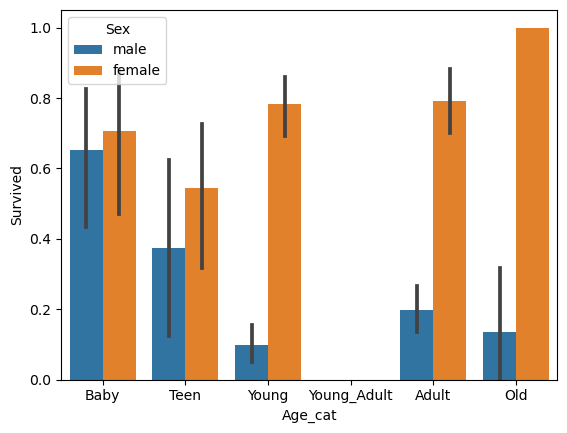

In [38]:
# 데이터 정리 및 시각화 2.

import seaborn as sns

group_names = ['Baby', 'Teen', 'Young', 'Young_Adult', 'Adult', 'Old']

def age_categorization(age):
    res = 0
    if age < 5 : res = "Baby"
    elif age < 15 : res = "Teen"
    elif age < 25 : res = "Young"
    elif age < 35 : res = "Young Adult"
    elif age < 60 : res = "Adult"
    else : res = "Old"
    return res

df_train['Age_cat'] = df_train['Age'].apply(age_categorization)

sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = df_train, order = group_names)

In [40]:
# 데이터 인코딩

from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    le = LabelEncoder()

    for feature in features:
        le.fit(df[feature])
        df[f"{feature}_labeled"] = le.transform(df[feature])

    return df

df_train = encode_features(df_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Cabin_labeled,Sex_labeled,Embarked_labeled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Young,146,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,81,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult,146,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,55,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Adult,146,1,3


<b3 style = "font-size:20pt;color:blue;"> 상기 내용 정리 </b3>

<ol>
    <li> 데이터 수집 > DataFrame 생성 : <b>df_original</b>
    <li> 데이터의 feature 와 label 나눠서 식별
    <li> 데이터 전처리
            nan 값 메꾸기 
            실제 전처리 : preprocessing
                범주변수 : .LabelEncoder / .OnehotEncoder / 
                양적변수 : .StandardScaler / .MinMaxScaler
                * 특정 피처(df에서는 컬럼) 에 대해서 필요한 부분만 loop 로 처리하는 관행
                for feature in features:
                    le = pre.LabelEncoder()
                    le.fit(df[feature])
                    df[feature] = le.transform(df[feature])
            필요없는 피처는 정리
    <li> 전처리된 데이터를 학습 데이터와 테스트 데이터로 분리 : X_train, X_test, Y_train, Y_test = model_selection.train_test_split
    <li> 학습 데이터를 재차 학습 데이터 / 검증 데이터로 분리 : model_selection.KFold
    <li> 각각의 (학습, 검증) 셋에 대한 머신러닝 모델의 결과 수집
        for train_index, valid_index in KFold.split(df_train):
            x_train = X_train[train_index], y_train = Y_train(train_index)
            x_valid = X_train(valid_index), y_valid = Y_train(valid_index)
            model.fit(x_train, y_train)
            pred = model.predict()
            metric = 어떤 metric(pred)

            metric 의 평균치를 가지고 해당 모델의 적합도 판단

        해당 과정을 cross_val_score (모델, X_train, Y_train, cv = ) 함수로 한번에 해결 가능 (학습/검증 분리 -> 모델 fit -> 모델들의 평균 스코어 산출)

    <li> 교차검증결과가 충분히 괜찮다면, 최종 predict 실시
        model.fit(X_train, Y_train)
        model.predict(X_test)
    
</ol>

    해당 과정을 GridSearchCV 로 하이퍼파라메터 최적화까지 실시 가능
    
    param_array = {'a' : [1,2,3,4....], 'b' : [3,4,5,6,...]}

    grid_모델명 = GridSearchCV(모델, param_grid = param_array, cv = 5, scoring = "특정 metric", refit = True, return_train_score = True =)
    grid_모델명.fit(X_train, Y_train)
    grid_모델명.predict()

    -> 학습/검증 분리 -> 모델 fit하면서 최적 파라메터까지 전부 검색하는 카테시안 곱의 가짓수 (학습/검증 개수 X 파라메터1 개수 X 파라메터2 개수.... 의 모델 fitting 하여 highest metric 모델 선택

In [69]:
# 상기 내용 정리

import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

# path = os.getcwd()
path = os.getcwd() + "//머신러닝_강의"

# 공부 목적으로 그냥 합쳐버림

df_train = pd.read_csv(path + "/titanic_train.csv")
df_test = pd.read_csv(path + "/titanic_test.csv")

# 1) df 에서 x값(feature) / y값(label) 쪼개기
y_df_train = df_train[['Survived']]
X_df_train = df_train.drop(columns = ['Survived'])

def fill_na(df): # nan값 메꾸기
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna("N", inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    return df

def drop_features(df): # 필요 없는 피쳐는 삭제
    df.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)
    return df

def encode_features(df): # string 형태의 범주변수들은 encoding 하여 바꿔준다.
    df['Cabin'] = df['Cabin'].str[:1]
    cat_features = ['Cabin', 'Sex', 'Embarked']

    for feature in cat_features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

# 상기 함수를 encompass 하는 container 함수

def preprocess(df):
    df = fill_na(df)
    df = drop_features(df)
    df = encode_features(df)

    return df

X_df_train = preprocess(X_df_train)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df_train, y_df_train , test_size = 0.2, random_state = 11)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712, 1) (179, 1)


In [71]:
# 여러 모델로 테스트

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_clf_score = accuracy_score(y_test, dt_pred)

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_clf_score = accuracy_score(y_test, rf_pred)

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_clf_score = accuracy_score(y_test, lr_pred)

print(dt_clf_score, rf_clf_score, lr_clf_score)


C:\Users\kanld\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8044692737430168 0.8379888268156425 0.8491620111731844


C:\Users\kanld\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanld\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
# 학습데이터를 검증데이터 추가하여 Kfold

from sklearn.model_selection import KFold

#1. linearly selected Kfold

def kfold_validate(model, kfold_num = 5):
    scores = {}
    kfold = KFold(kfold_num)
    
    for iter_count, (train_index, valid_index) in enumerate(kfold.split(X_df_train)):
        X_train, y_train = X_train.iloc[train_index], y_train.iloc[train_index]
        X_test, y_test = X_train.iloc[valid_index], y_train.iloc[valid_index]

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        model_score = accuracy_score(y_test, pred)
        scores[f"{model}_{iter_count}"] = model_score

    return scores

# 2. 위에 한 거 그냥 cross_val_score 로 한번에 (kfold는 stratified kfold 자동으로)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_train, y_train, cv = 5)


In [78]:
print(kfold_validate(dt_clf, 5))
scores

{'DecisionTreeClassifier()_0': 0.7541899441340782, 'DecisionTreeClassifier()_1': 0.7808988764044944, 'DecisionTreeClassifier()_2': 0.7865168539325843, 'DecisionTreeClassifier()_3': 0.7584269662921348, 'DecisionTreeClassifier()_4': 0.8314606741573034}


array([0.73743017, 0.76966292, 0.80337079, 0.76966292, 0.8258427 ])

In [88]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8]
}

grid_dt_clf = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, refit = True)

grid_dt_clf.fit(X_train, y_train)

# 여러 메서드

print("최적 하이퍼파라메터 :", grid_dt_clf.best_params_)
print("최고 점수 :", grid_dt_clf.best_score_)
print("최적 하이퍼파라메터 :", grid_dt_clf.best_index_)

pred = grid_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print(accuracy)




최적 하이퍼파라메터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 점수 : 0.7991825076332119
최적 하이퍼파라메터 : 12
0.8715083798882681


In [4]:
# 개인 실습

#1. 데이터 수집
#2. 데이터 전처리
#3. 데이터 피처/라벨 분리 
#4. 데이터 학습 / 테스트 분리
#5. 교차검증목적 분리
#6. 모델 fit (하이퍼파라메터 등) 
#7. 테스트에 대한 측정


import pandas as pd
import numpy as np

df_data = pd.read_csv("C:/Users/kanld/Desktop/allPractice/머신러닝_강의/titanic_train.csv")

# 전처리 : 전처리 모듈 생성

from sklearn.preprocessing import LabelEncoder

def fill_na(df_column):
    try:
        df_column = df_column.fillna(df_column.mean())
    except:
        df_column = df_column.fillna(method = 'ffill')
    return df_column

def encoding_cat_feature(feature_array):
    lb = LabelEncoder()
    lb.fit(feature_array)
    res = lb.transform(feature_array)
    return res

def cabin_first_word(df):
    df['Cabin'] = df['Cabin'].str[:1]
    return df

def needed_data_only(df, column_list:list):
    df = df[column_list]
    return df

def preprocess(df, encoding_list = ['Sex', 'Cabin', 'Embarked']):
    df['Cabin'].fillna("N", inplace = True)
    df = needed_data_only(df, column_list = ['Pclass', 'Survived', 'Sex', 'Age', 'Cabin', 'Embarked'])
    df = df.apply(fill_na, axis = 0)
    df = cabin_first_word(df)
    df[encoding_list] = df[encoding_list].apply(encoding_cat_feature)

    return df

df_data = preprocess(df_data)

# 피처, 라벨 분리

df_feature = df_data.drop(columns = ['Survived'])
df_label = df_data[['Survived']]

# 학습, 테스트 분리

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_feature, df_label, test_size = 0.2)

# 5,6 + 파라메터 최적화 한번에

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()
params = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8]
}

grid_dt_clf = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, refit = True, return_train_score = True)

grid_dt_clf.fit(X_train, Y_train)

pred = grid_dt_clf.predict(X_test)

# 7. 검증

from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test, pred)

<b3 style = "font-size:20pt;color:blue;"> 상기 내용 정리 </b3>

<ol>
    <li> 데이터 수집 > DataFrame 생성 : <b>df_original</b>
    <li> 데이터의 feature 와 label 나눠서 식별
    <li> 데이터 전처리
            nan 값 메꾸기 
            실제 전처리 : preprocessing
                범주변수 : .LabelEncoder / .OnehotEncoder / 
                양적변수 : .StandardScaler / .MinMaxScaler
                * 특정 피처(df에서는 컬럼) 에 대해서 필요한 부분만 loop 로 처리하는 관행
                for feature in features:
                    le = pre.LabelEncoder()
                    le.fit(df[feature])
                    df[feature] = le.transform(df[feature])
            필요없는 피처는 정리
    <li> 전처리된 데이터를 학습 데이터와 테스트 데이터로 분리 : X_train, X_test, Y_train, Y_test = model_selection.train_test_split
    <li> 학습 데이터를 재차 학습 데이터 / 검증 데이터로 분리 : model_selection.KFold
    <li> 각각의 (학습, 검증) 셋에 대한 머신러닝 모델의 결과 수집
        for train_index, valid_index in KFold.split(df_train):
            x_train = X_train[train_index], y_train = Y_train(train_index)
            x_valid = X_train(valid_index), y_valid = Y_train(valid_index)
            model.fit(x_train, y_train)
            pred = model.predict()
            metric = 어떤 metric(pred)

            metric 의 평균치를 가지고 해당 모델의 적합도 판단

        해당 과정을 cross_val_score (모델, X_train, Y_train, cv = ) 함수로 한번에 해결 가능 (학습/검증 분리 -> 모델 fit -> 모델들의 평균 스코어 산출)

    <li> 교차검증결과가 충분히 괜찮다면, 최종 predict 실시
        model.fit(X_train, Y_train)
        model.predict(X_test)
    
</ol>

    해당 과정을 GridSearchCV 로 하이퍼파라메터 최적화까지 실시 가능
    
    param_array = {'a' : [1,2,3,4....], 'b' : [3,4,5,6,...]}

    grid_모델명 = GridSearchCV(모델, param_grid = param_array, cv = 5, scoring = "특정 metric", refit = True, return_train_score = True =)
    grid_모델명.fit(X_train, Y_train)
    grid_모델명.predict()

    -> 학습/검증 분리 -> 모델 fit하면서 최적 파라메터까지 전부 검색하는 카테시안 곱의 가짓수 (학습/검증 개수 X 파라메터1 개수 X 파라메터2 개수.... 의 모델 fitting 하여 highest metric 모델 선택